#**[Predicting Thyroid Cancer Recurrence with Machine Learning](https://www.sciencebuddies.org/science-fair-projects/project-ideas/ArtificialIntelligence_p020/artificial-intelligence/thyroid_cancer)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.

## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

In [1]:
#Age	Gender	Smoking	Hx Smoking	Hx Radiotherapy	Thyroid Function	Physical Examination	Adenopathy	Pathology	Focality	T	N	M	Stage	Response
# There are also code blocks, like this one.

# The green text in a code block are comments. Comments are descriptions of what the code does.

# The non-green text in a code block is the Python code. Click on the triangle in the top left corner to run this code block.

print("Congratulations, you ran a code block! Try changing the text in the code and running it again.")

Congratulations, you ran a code block! Try changing the text in the code and running it again.


# Importing Libraries

In [2]:
!pip install graphviz==0.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 10.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
# Data manipulation and numerical operations
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations

# Data visualization libraries
import matplotlib.pyplot as plt   # For plotting and visualizations
import graphviz   # For visualizing decision trees

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split   # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance
from sklearn.metrics import roc_curve, roc_auc_score  # For calculating ROC curve and AUC

# Scikit-learn: Preprocessing
from sklearn.preprocessing import LabelEncoder   # For encoding categorical labels into numeric values
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical features using one-hot encoding

# Scikit-learn: Machine learning model
from sklearn.ensemble import RandomForestClassifier  # For building random forest models

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz  # For exporting decision trees in DOT format
from sklearn.tree import plot_tree  # For plotting decision trees

# 1. Process the Data with All Features

## 1.1 Loading the Data into a Pandas DataFrame (finished)

Code Block 1A

Code Block 1B

In [4]:
# Specify the file path to the CSV file containing the thyroid cancer recurrence data
csv_path = "/work/thyroid_data - thyroid_data.csv"

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame to get a quick overview of the data
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,T1a,N0,M0,I,Excellent,No


### 1.1.1 Label Encoding

Code Block 1C

In [5]:
# Label encoding yes or no values
#This is done because machine learning algorithms expect numeric input. 
#It also allows easier calculations on data (e.g. sums or averages)


# Define mapping
mapping = {'No': 0, 'Yes': 1}

# TODO: Insert names of columns that have Yes or No values
#hx = history
boolean_columns = ['Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Recurred']
df[boolean_columns] = df[boolean_columns].map(mapping.get)


df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,F,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Indeterminate,0
1,34,F,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Excellent,0
2,30,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Excellent,0
3,62,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,T1a,N0,M0,I,Excellent,0
4,62,F,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,T1a,N0,M0,I,Excellent,0


Code Block 1D

In [6]:
# Label encode features with only 2 values. Converts categorical labels into numeric values.
le = LabelEncoder()

# TODO: Input column names that only have 2 values
columns_to_encode = ['Gender', 'Focality', 'M']

for column in columns_to_encode:
  df[column] = le.fit_transform(df[column])


df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,T1a,N0,0,I,Excellent,0


### 1.1.2 Label Encoding with Order

Code Block 1E

In [7]:
df['Physical Examination'].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

Code Block 1F

In [8]:
# Correcting the mapping by fixing the typo in 'Single nodular goiter_right' (underscore instead of hyphen)
mapping = {'Normal': 0,
            'Diffuse goiter': 1,
            'Single nodular goiter-left': 2,
            'Single nodular goiter-right': 2,
            'Multinodular goiter': 3
}

df['Physical Examination'] = df['Physical Examination'].map(mapping)

#checks if any of the unique values in the column (returned as an array) are NaN because they are unspecified by the dictionary.
if np.isnan(df['Physical Examination'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,No,Micropapillary,1,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,No,Micropapillary,1,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,No,Micropapillary,1,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,No,Micropapillary,1,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,No,Micropapillary,0,T1a,N0,0,I,Excellent,0


Code Block 1G

In [9]:
# TODO: Use the .unique() function to find the unique values for 'Adenopathy'
df['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

Code Block 1H

In [10]:
# TODO: Define mapping for 'Adenopathy'
mapping = {'No':0,
            'Left': 1,
            'Right': 1,
            'Posterior': 2,
            'Bilateral': 3,
            'Extensive': 4
        }

df['Adenopathy'] = df['Adenopathy'].map(mapping)

if np.isnan(df['Adenopathy'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,Micropapillary,1,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,Micropapillary,1,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,Micropapillary,1,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,Micropapillary,1,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,Micropapillary,0,T1a,N0,0,I,Excellent,0


Code Block 1I

In [11]:
# TODO: Use the .unique() function to find the unique values for 'Pathology'
df['Pathology'].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthle cell'],
      dtype=object)

Code Block 1J

In [12]:
# TODO: Define mapping for 'Pathology'
mapping = {'Micropapillary': 0,
            'Papillary': 1,
            'Follicular': 2,
            'Hurthle cell': 3
            }

df['Pathology'] = df['Pathology'].map(mapping)

if np.isnan(df['Pathology'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,T1a,N0,0,I,Excellent,0


Code Block 1K

In [13]:
# TODO: Use the .unique() function to find the unique values for 'T'
df['T'].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

Code Block 1L

In [14]:
# TODO: Define mapping for 'T'
mapping = {'T1a': 0,
            'T1b': 1,
            'T2': 2,
            'T3a': 3,
            'T3b': 4,
            'T4a': 5,
            'T4b': 6
            }

df['T'] = df['T'].map(mapping)

if np.isnan(df['T'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,N0,0,I,Excellent,0


Code Block 1M

In [15]:
# TODO: Use the .unique() function to find the unique values for 'N'
df['N'].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

Code Block 1N

In [16]:
# TODO: Define mapping for 'N'
mapping = {'N0': 0,
            'N1a': 1,
            'N1b': 2}

df['N'] = df['N'].map(mapping)

if np.isnan(df['N'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,0,0,I,Excellent,0


Code Block 1O

In [17]:
# TODO: Use the .unique() function to find the unique values for 'Stage'
df['Stage'].unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

Code Block 1P

In [18]:
# TODO: Define mapping for 'Stage'
mapping = {'I':0,
            'II': 1,
            'III': 2,
            'IVA': 3,
            'IVB': 4,
            }

df['Stage'] = df['Stage'].map(mapping)

if np.isnan(df['Stage'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,0,0,0,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,0,0,0,Excellent,0


Code Block 1Q

In [19]:
# TODO: Use the .unique() function to find the unique values for 'Response'
df['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

Code Block 1R

In [20]:
# TODO: Define mapping for 'Response'
mapping = {'Excellent': 0,
            'Structural Incomplete': 1,
            'Biochemical Incomplete': 2,
            'Indeterminate': 3}

df['Response'] = df['Response'].map(mapping)

if np.isnan(df['Response'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,3,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,0,0,0,0,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,0,0,0,0,0


### 1.1.3 One-Hot Encoding

Code Block 1S

In [21]:
# Initialize a OneHotEncoder object
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the 'Thyroid Function' column of the dataframe 'df'
# and transform it into a one-hot encoded array. The 'toarray()' method
# converts the sparse matrix output into a dense numpy array.


#Instead of assigning a numeric value to each possible category, 
#it will assign a binary number with the number of categories as digits. 
#A digit is 1 if that specific category corresponds, and all other digits are 0. 
#prevents program from accidentally observing some sort of mathematical relationship 
ohe.fit_transform(df[['Thyroid Function']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

Code Block 1T

In [22]:
# Fit the OneHotEncoder to the 'Thyroid Function' column of the dataframe 'df'
# and transform it into a one-hot encoded array. The 'toarray()' method
# converts the sparse matrix output into a dense numpy array.
feature_array = ohe.fit_transform(df[['Thyroid Function']]).toarray()

# Get the category labels from the fitted OneHotEncoder
feature_labels = ohe.categories_

# Convert the list of arrays (from ohe.categories_) to a flattened numpy array
feature_labels = np.array(feature_labels).ravel()

# Create a DataFrame from the one-hot encoded array with column names set to the flattened feature labels
pd.DataFrame(feature_array, columns=feature_labels)

,Clinical Hyperthyroidism,Clinical Hypothyroidism,Euthyroid,Subclinical Hyperthyroidism,Subclinical Hypothyroidism
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
378,0.0,0.0,1.0,0.0,0.0
379,0.0,0.0,1.0,0.0,0.0
380,0.0,0.0,1.0,0.0,0.0
381,1.0,0.0,0.0,0.0,0.0


Code Block 1U

In [23]:
# Create a DataFrame from the one-hot encoded array (feature_array)
# using the flattened feature labels (feature_labels) as column names
features = pd.DataFrame(feature_array, columns=feature_labels)

# Concatenate the original dataframe (df) and the new one-hot encoded features (features)
# along the columns (axis=1). This results in a combined DataFrame with both the original
# and one-hot encoded features.
pd.concat([df, features], axis=1)

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,N,M,Stage,Response,Recurred,Clinical Hyperthyroidism,Clinical Hypothyroidism,Euthyroid,Subclinical Hyperthyroidism,Subclinical Hypothyroidism
0,27,0,0,0,0,Euthyroid,2,0,0,1,...,0,0,0,3,0,0.0,0.0,1.0,0.0,0.0
1,34,0,0,1,0,Euthyroid,3,0,0,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,30,0,0,0,0,Euthyroid,2,0,0,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,62,0,0,0,0,Euthyroid,2,0,0,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,62,0,0,0,0,Euthyroid,3,0,0,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,Euthyroid,2,1,1,1,...,2,1,4,2,1,0.0,0.0,1.0,0.0,0.0
379,81,1,1,0,1,Euthyroid,3,4,1,0,...,2,1,4,1,1,0.0,0.0,1.0,0.0,0.0
380,72,1,1,1,0,Euthyroid,3,3,1,0,...,2,1,4,1,1,0.0,0.0,1.0,0.0,0.0
381,61,1,1,1,1,Clinical Hyperthyroidism,3,4,3,0,...,2,0,3,1,1,1.0,0.0,0.0,0.0,0.0


Code Block 1V

In [24]:
# Concatenate the original dataframe (df) with the new one-hot encoded features (features)
# along the columns (axis=1). This adds the one-hot encoded columns to the original dataframe.
df = pd.concat([df, features], axis=1)

# Drop the original 'Thyroid Function' column from the dataframe
# as it has been replaced by the one-hot encoded columns.
df = df.drop(['Thyroid Function'], axis='columns')

# Display the first few rows of the updated dataframe to inspect the result.
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Response,Recurred,Clinical Hyperthyroidism,Clinical Hypothyroidism,Euthyroid,Subclinical Hyperthyroidism,Subclinical Hypothyroidism
0,27,0,0,0,0,2,0,0,1,0,0,0,0,3,0,0.0,0.0,1.0,0.0,0.0
1,34,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,30,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,62,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,62,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0


### 1.1.4 Split to Train and Test

Code Block 1W

In [25]:
# Drop the 'Recurred' column from the DataFrame to create the input features DataFrame
inputs = df.drop('Recurred', axis='columns')

# Select the target column 'Recurred' from the DataFrame to create the target DataFrame
target = df['Recurred']

Code Block 1X

In [26]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=30)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (306, 19)
X_test shape: (77, 19)
y_train shape: (306,)
y_test shape: (77,)


## 1.2 Train the Model (work here)

Code Block Y

## 

In [27]:
# Creating a Decision Tree Classifier model object
model = RandomForestClassifier()

Code Block 1Z

In [28]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)

RandomForestClassifier()

## 1.3 Evaluate the Model

Code Block 1AA

In [29]:
# Evaluating the trained model's performance on the test data (X_test) and corresponding labels (y_test)
model.score(X_test, y_test)

0.922077922077922

y_test = Actual Group

y_pred = Predicted Group

Code Block 1BB

In [30]:
# Printing out the original group to compare
y_test = y_test.to_numpy()

print(y_test)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 1]


Code Block 1CC

In [31]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Printing the predicted labels
print(y_pred)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 1]


## 1.4 Visualize the Model

Code Block 1DD

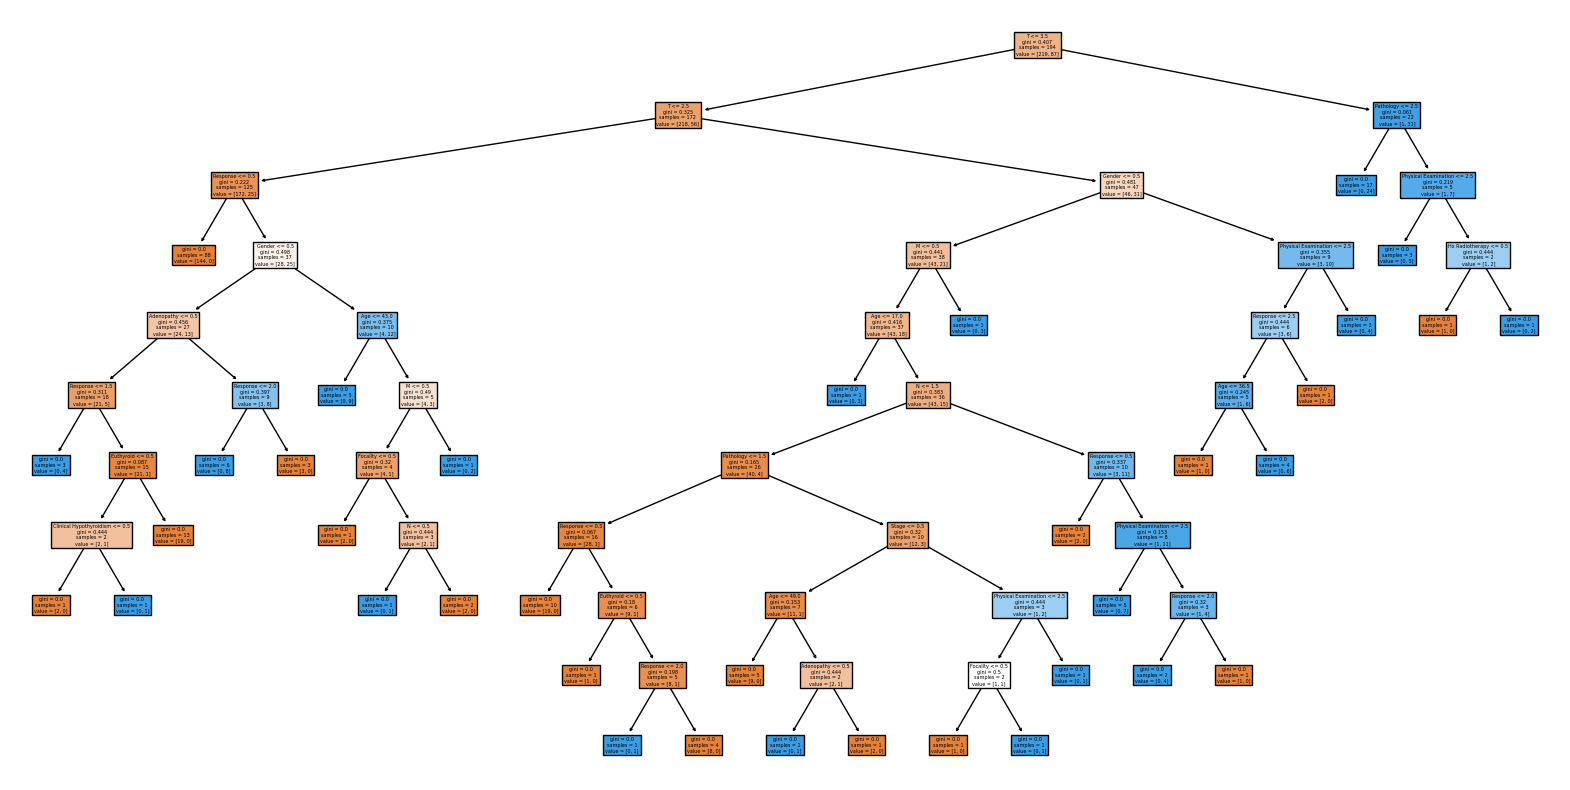

In [32]:
# TODO: Change this value to view the other decision trees
tree_number = 1

# TODO: Change this value to change the depth of the decision tree
max_depth = 100

feature_names = list(df.columns)
feature_names.pop(15)

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[tree_number], feature_names=feature_names, max_depth=max_depth, filled=True)
plt.show()

Code Block 1EE

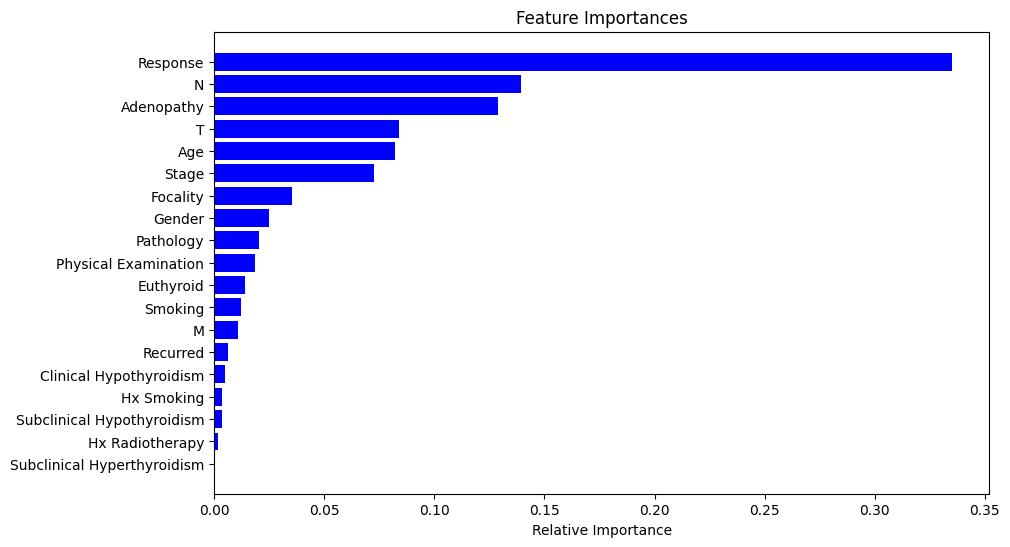

In [33]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 2. Process the Data Again with Fewer Features

## 2.1 Preprocess the Dataset

### 2.1.1 Select the Top 3 Columns



Code Block 2A

In [34]:
# TODO: List the columns you want to keep here
print(df.columns)
df2 = df[['Response', 'Adenopathy', 'N', 'Recurred']]

df2.head()

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'T', 'N',
       'M', 'Stage', 'Response', 'Recurred', 'Clinical Hyperthyroidism',
       'Clinical Hypothyroidism', 'Euthyroid', 'Subclinical Hyperthyroidism',
       'Subclinical Hypothyroidism'],
      dtype='object')


,Response,Adenopathy,N,Recurred
0,3,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### 2.1.2 Split to Train and Test

Code Block 2B

In [35]:
inputs2 = df2.drop('Recurred', axis='columns')
target2 = df2['Recurred']

Code Block 2C

In [36]:
# Split the data into train and test sets (80% train, 20% test)
X2_train, X2_test, y2_train, y2_test = train_test_split(inputs2, target2, test_size=0.2, random_state=410)

print("X2_train shape:", X2_train.shape)
print("X2_test shape:", X2_test.shape)
print("y2_train shape:", y2_train.shape)
print("y2_test shape:", y2_test.shape)

X2_train shape: (306, 3)
X2_test shape: (77, 3)
y2_train shape: (306,)
y2_test shape: (77,)


## 2.2 Train the Model

Code Block 2D

In [37]:
# Creating a Decision Tree Classifier model object
model2 = RandomForestClassifier()

Code Block 2E

In [38]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model2.fit(X2_train, y2_train)

RandomForestClassifier()

## 2.3 Evaluate the Model

Code Block 2F

In [39]:
# Evaluating the trained model's performance on the test data (X_test) and corresponding labels (y_test)
model2.score(X2_test, y2_test)

0.935064935064935

Code Block 2G

In [40]:
# Printing out the original group to compare
y2_test = y2_test.to_numpy()

print(y2_test)

[0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0]


Code Block 2H

In [41]:
# Using the trained model to make predictions on the test data (X_test)
y2_pred = model2.predict(X2_test)

# Printing the predicted labels
print(y2_pred)

[0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0]


## 2.4 Visualize the Model

Code Block 2I

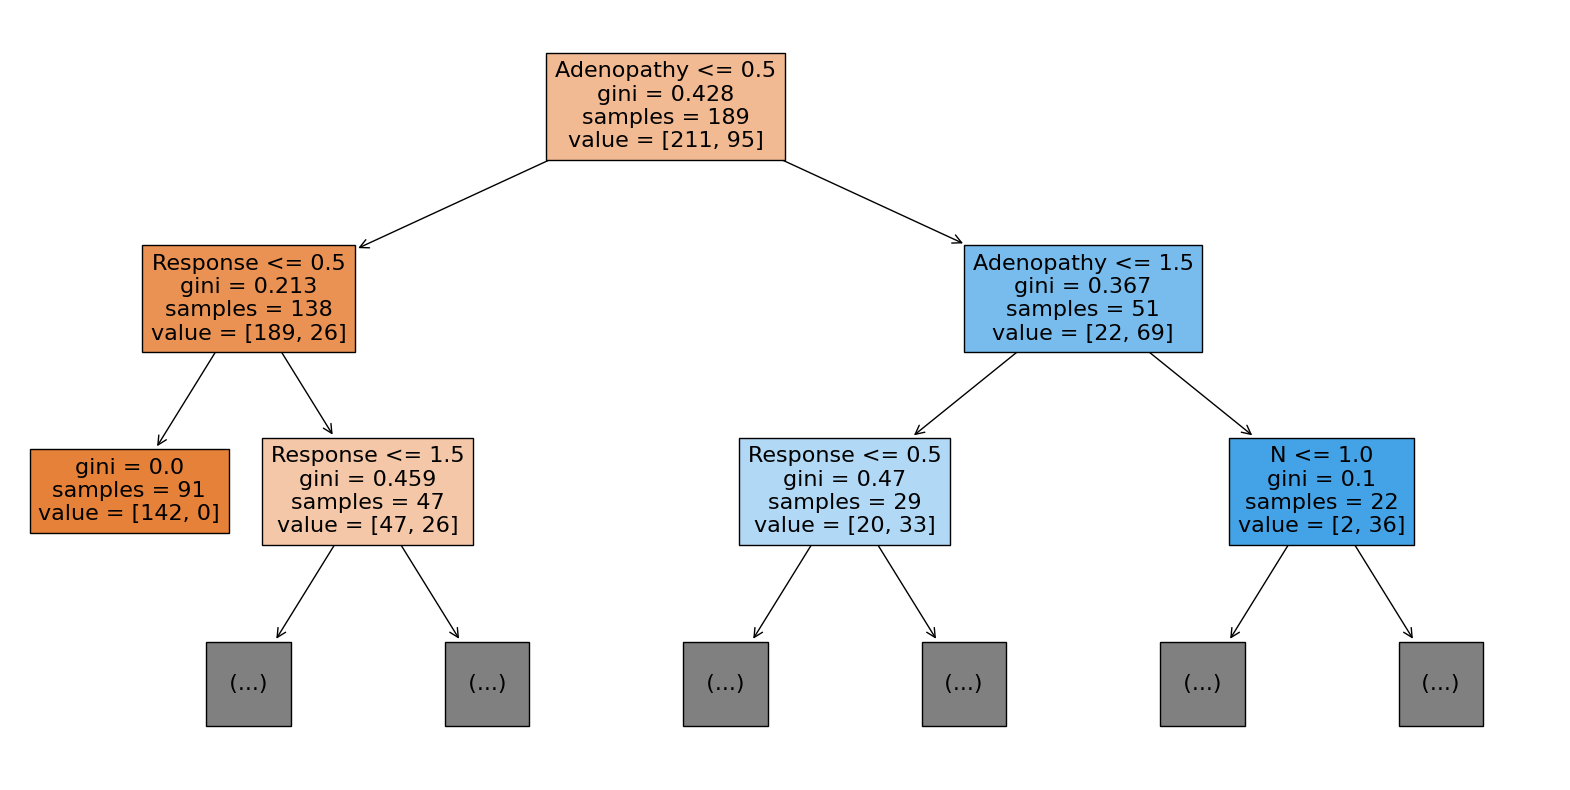

In [42]:
# TODO: Change this value to view the other decision trees
tree_number = 0

# TODO: Change this value to change the depth of the decision tree
max_depth = 2

feature_names = list(df2.columns)
feature_names.remove('Recurred')

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(model2.estimators_[tree_number], max_depth=max_depth, feature_names=feature_names, filled=True)
plt.show()

Code Block 2J

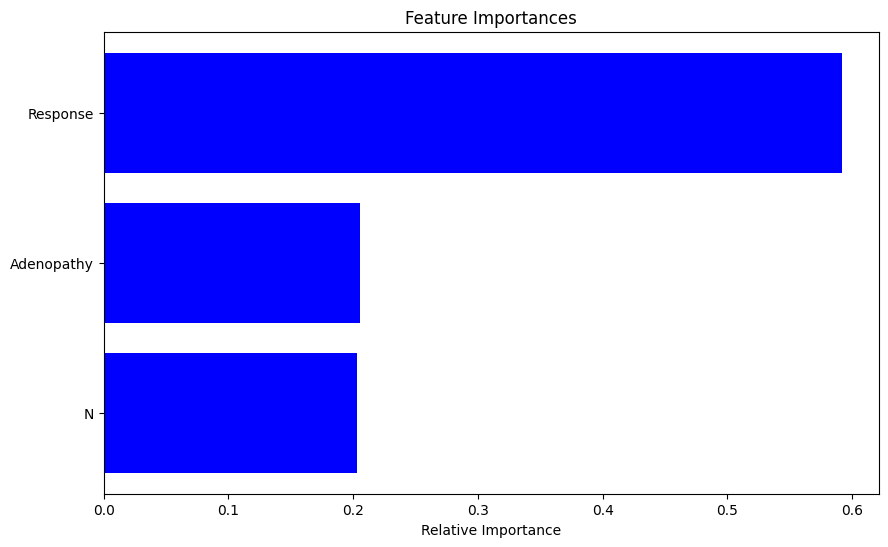

In [43]:
# Feature importance
importances = model2.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Code Block 2K (Optional Advanced Analysis)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'T', 'N',
       'M', 'Stage', 'Response', 'Recurred', 'Clinical Hyperthyroidism',
       'Clinical Hypothyroidism', 'Euthyroid', 'Subclinical Hyperthyroidism',
       'Subclinical Hypothyroidism'],
      dtype='object')
X_train shape: (306, 7)
X_test shape: (77, 7)
y_train shape: (306,)
y_test shape: (77,)
0.8571428571428571
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0]
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0]


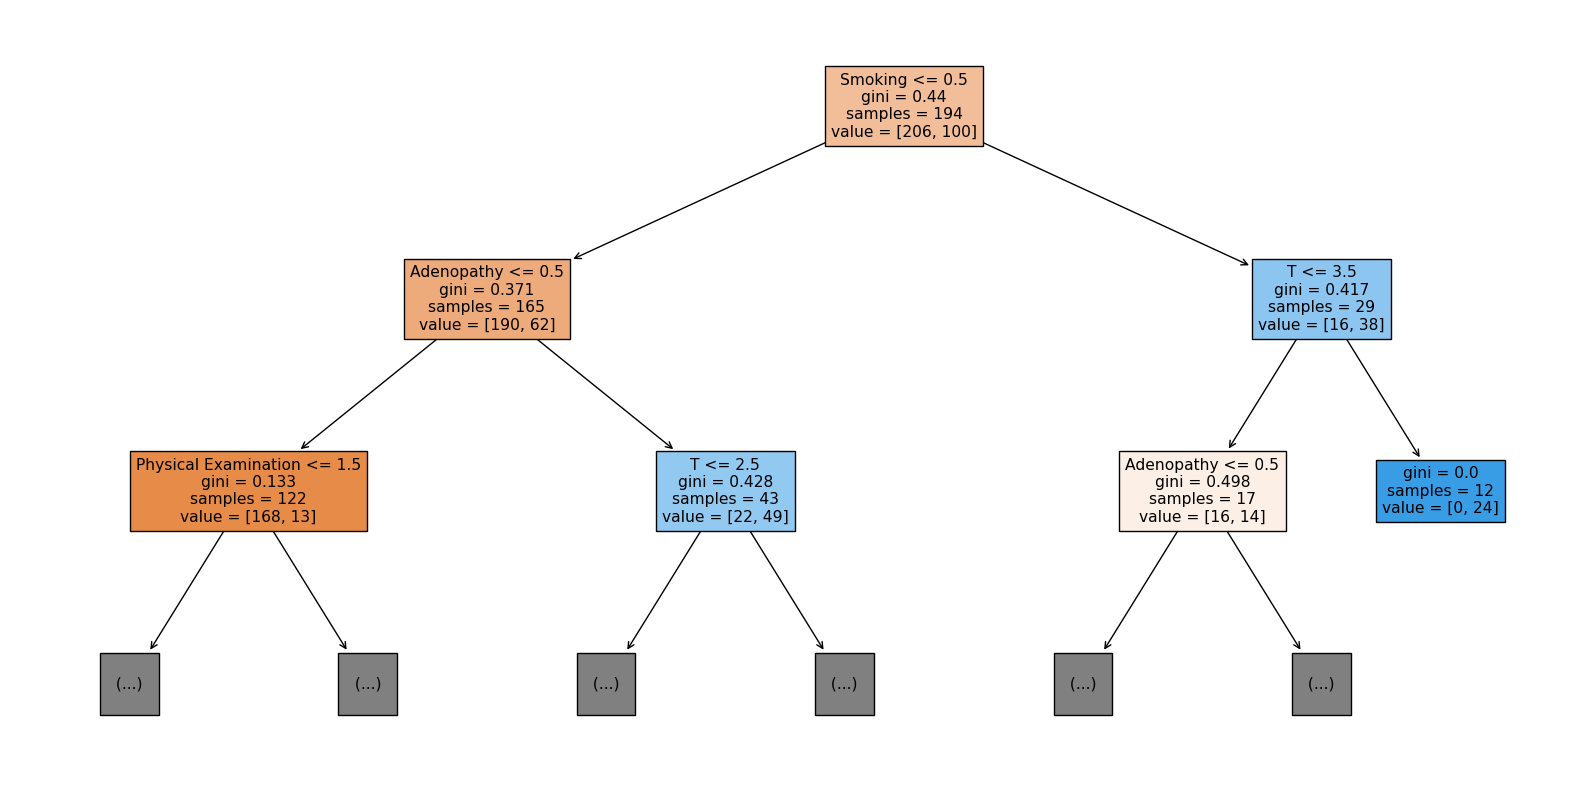

In [44]:
#Additional 3rd Model
# TODO: List the columns you want to keep here
print(df.columns)
df3 = df[['Adenopathy', 'T', 'N', 'Focality', 'Smoking', 'Physical Examination', 'Gender', 'Recurred']]

df3.head()

inputs3 = df3.drop('Recurred', axis='columns')
target3 = df3['Recurred']

# Split the data into train and test sets (80% train, 20% test)
X3_train, X3_test, y3_train, y3_test = train_test_split(inputs3, target3, test_size=0.2, random_state=69)

print("X_train shape:", X3_train.shape)
print("X_test shape:", X3_test.shape)
print("y_train shape:", y3_train.shape)
print("y_test shape:", y3_test.shape)

# Creating a Decision Tree Classifier model object
model3 = RandomForestClassifier()

# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model3.fit(X3_train, y3_train)

# Evaluating the trained model's performance on the test data (X_test) and corresponding labels (y_test)
print(model3.score(X3_test, y3_test))

# Printing out the original group to compare
y3_test = y3_test.to_numpy()

print(y3_test)

# Using the trained model to make predictions on the test data (X_test)
y3_pred = model3.predict(X3_test)

# Printing the predicted labels
print(y3_pred)

# TODO: Change this value to view the other decision trees
tree_number = 0

# TODO: Change this value to change the depth of the decision tree
max_depth = 2

feature_names = list(df3.columns)
feature_names.remove('Recurred')

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(model3.estimators_[tree_number], max_depth=max_depth, feature_names=feature_names, filled=True)
plt.show()



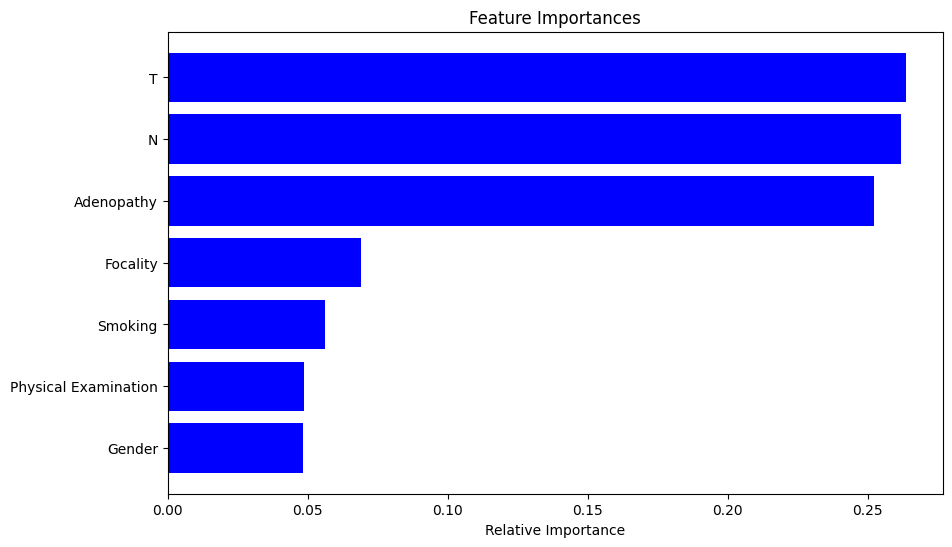

In [45]:
# Feature importance
importances = model3.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [46]:
print(model.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.922077922077922
0.935064935064935
0.8571428571428571
